In [1]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


C:\Users\Chainsword\AppData\Local\Temp\ipykernel_10816\2700633988.py:12: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
experiment_sub_dir = "2025May02-101004_configs"
exp_path = os.path.join(r"D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_optim.args_.eps', 'sub_exp_cfg_optim.args_.lr',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.traini

In [3]:
df

epoch_type  frame_stamp  greedy_epsilon  episode_rewards_min  \
0       training       200000          0.8713            -6.228749   
1       training       400000          0.7393            -6.153896   
2       training       600000          0.6073            -5.959696   
3       training       800000          0.4753            -5.966054   
4       training      1000000          0.3433            -6.079056   
...          ...          ...             ...                  ...   
5755  validation      1200000             NaN            -6.344507   
5756  validation      1400000             NaN            -5.792704   
5757  validation      1600000             NaN            -5.840644   
5758  validation      1800000             NaN            -5.576103   
5759  validation      2000000             NaN            -5.554734   

      episode_rewards_max  episode_rewards_mean  episode_rewards_median  \
0               -5.194196             -5.728843               -5.722987   
1               -5.413619             -5.740995               -5.711434   
2               -5.539279             -5.687367               -5.664630   
3               -5.574047             -5.750942               -5.785080   
4               -5.603883             -5.821793               -5.826401   
...                   ...                   ...                     ...   
5755            -6.342974             -6.343916               -6.343936   
5756            -5.791818             -5.792229               -5.792235   
5757            -5.839810             -5.840145               -5.840140   
5758            -5.575736             -5.575973               -5.575980   
5759            -5.554332             -5.554528               -5.554521   

      episode_rewards_std  episode_discounted_rewards_min  \
0                0.126728                       -4.146660   
1                0.099425                       -4.075383   
2                0.072505                       -4.009102   
3                0.080112                       -4.009274   
4                0.056542                       -4.027899   
...                   ...                             ...   
5755             0.000334                       -4.105431   
5756             0.000198                       -3.939400   
5757             0.000197                       -3.956256   
5758             0.000089                       -3.866250   
5759             0.000078                       -3.862658   

      episode_discounted_rewards_max  ...             epoch_time  \
0                          -3.692452  ... 0 days 00:05:01.201318   
1                          -3.753871  ... 0 days 00:05:20.927150   
2                          -3.837859  ... 0 days 00:05:38.464231   
3                          -3.865653  ... 0 days 00:05:40.444501   
4                          -3.878312  ... 0 days 00:05:40.628587   
...                              ...  ...                    ...   
5755                       -4.104843  ... 0 days 00:00:00.368872   
5756                       -3.939046  ... 0 days 00:00:00.382082   
5757                       -3.955920  ... 0 days 00:00:00.395674   
5758                       -3.866092  ... 0 days 00:00:00.390410   
5759                       -3.862485  ... 0 days 00:00:00.395990   

      sub_exp_cfg_optim.args_.eps  sub_exp_cfg_optim.args_.lr  \
0                           1e-07                       1e-06   
1                           1e-07                       1e-06   
2                           1e-07                       1e-06   
3                           1e-07                       1e-06   
4                           1e-07                       1e-06   
...                           ...                         ...   
5755                        1e-05                      0.0001   
5756                        1e-05                      0.0001   
5757                        1e-05                      0.0001   
5758                        1e-05                      0.0001   

In [4]:
df[df['epoch_type'] == 'validation']

epoch_type  frame_stamp  greedy_epsilon  episode_rewards_min  \
10    validation       200000             NaN            -5.847597   
11    validation       400000             NaN            -5.675063   
12    validation       600000             NaN            -5.669751   
13    validation       800000             NaN            -5.804510   
14    validation      1000000             NaN            -5.868811   
...          ...          ...             ...                  ...   
5755  validation      1200000             NaN            -6.344507   
5756  validation      1400000             NaN            -5.792704   
5757  validation      1600000             NaN            -5.840644   
5758  validation      1800000             NaN            -5.576103   
5759  validation      2000000             NaN            -5.554734   

      episode_rewards_max  episode_rewards_mean  episode_rewards_median  \
10              -5.847361             -5.847485               -5.847493   
11              -5.674780             -5.674922               -5.674925   
12              -5.669471             -5.669603               -5.669602   
13              -5.804261             -5.804399               -5.804400   
14              -5.868441             -5.868619               -5.868610   
...                   ...                   ...                     ...   
5755            -6.342974             -6.343916               -6.343936   
5756            -5.791818             -5.792229               -5.792235   
5757            -5.839810             -5.840145               -5.840140   
5758            -5.575736             -5.575973               -5.575980   
5759            -5.554332             -5.554528               -5.554521   

      episode_rewards_std  episode_discounted_rewards_min  \
10               0.000059                       -3.961840   
11               0.000053                       -3.909879   
12               0.000053                       -3.907325   
13               0.000061                       -3.943177   
14               0.000070                       -3.962491   
...                   ...                             ...   
5755             0.000334                       -4.105431   
5756             0.000198                       -3.939400   
5757             0.000197                       -3.956256   
5758             0.000089                       -3.866250   
5759             0.000078                       -3.862658   

      episode_discounted_rewards_max  ...             epoch_time  \
10                         -3.961741  ... 0 days 00:00:00.629543   
11                         -3.909767  ... 0 days 00:00:00.616309   
12                         -3.907205  ... 0 days 00:00:00.662841   
13                         -3.943075  ... 0 days 00:00:00.618175   
14                         -3.962349  ... 0 days 00:00:00.623640   
...                              ...  ...                    ...   
5755                       -4.104843  ... 0 days 00:00:00.368872   
5756                       -3.939046  ... 0 days 00:00:00.382082   
5757                       -3.955920  ... 0 days 00:00:00.395674   
5758                       -3.866092  ... 0 days 00:00:00.390410   
5759                       -3.862485  ... 0 days 00:00:00.395990   

      sub_exp_cfg_optim.args_.eps  sub_exp_cfg_optim.args_.lr  \
10                          1e-07                       1e-06   
11                          1e-07                       1e-06   
12                          1e-07                       1e-06   
13                          1e-07                       1e-06   
14                          1e-07                       1e-06   
...                           ...                         ...   
5755                        1e-05                      0.0001   
5756                        1e-05                      0.0001   
5757                        1e-05                      0.0001   
5758                        1e-05                      0.0001   

In [5]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_optim.args_.eps                                 1e-05
sub_exp_cfg_optim.args_.lr                                 0.0001
sub_exp_cfg_agent_params.args_.target_model_update_freq      4000
sub_exp_cfg_agent_params.args_.training_freq                    8
sub_exp_cfg_agent_params.args_.batch_size                      32
sub_exp_cfg_agent_params.args_.action_w_noise_amplitude       0.1
Name: 4, dtype: object
Best mean reward: -6.1538563314326815


In [6]:
averaged_results

sub_exp_cfg_optim.args_.eps sub_exp_cfg_optim.args_.lr  \
0                         1e-05                     0.0001   
1                         1e-05                     0.0001   
2                         1e-05                     0.0001   
3                         1e-05                     0.0001   
4                         1e-05                     0.0001   
..                          ...                        ...   
139                       1e-07                      1e-06   
140                       1e-07                      1e-06   
141                       1e-07                      1e-06   
142                       1e-07                      1e-06   
143                       1e-07                      1e-06   

    sub_exp_cfg_agent_params.args_.target_model_update_freq  \
0                                                 4000        
1                                                 4000        
2                                                 4000        
3                                                 4000        
4                                                 4000        
..                                                 ...        
139                                               8000        
140                                               8000        
141                                               8000        
142                                               8000        
143                                               8000        

    sub_exp_cfg_agent_params.args_.training_freq  \
0                                              4   
1                                              4   
2                                              4   
3                                              4   
4                                              8   
..                                           ...   
139                                            4   
140                                            8   
141                                            8   
142                                            8   
143                                            8   

    sub_exp_cfg_agent_params.args_.batch_size  \
0                                          32   
1                                          32   
2                                          64   
3                                          64   
4                                          32   
..                                        ...   
139                                        64   
140                                        32   
141                                        32   
142                                        64   
143                                        64   

    sub_exp_cfg_agent_params.args_.action_w_noise_amplitude  \
0                                                  0.1        
1                                                  0.3        
2                                                  0.1        
3                                                  0.3        
4                                                  0.1        
..                                                 ...        
139                                                0.3        
140                                                0.1        
141                                                0.3        
142                                                0.1        
143                                                0.3        

     episode_rewards_mean                                sub_experiment_path  
0               -8.262870  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...  
1               -8.098173  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...  
2              -12.994779  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...  
3              -10.878216  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...  
4               -6.153856  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...  
..                    ...                                

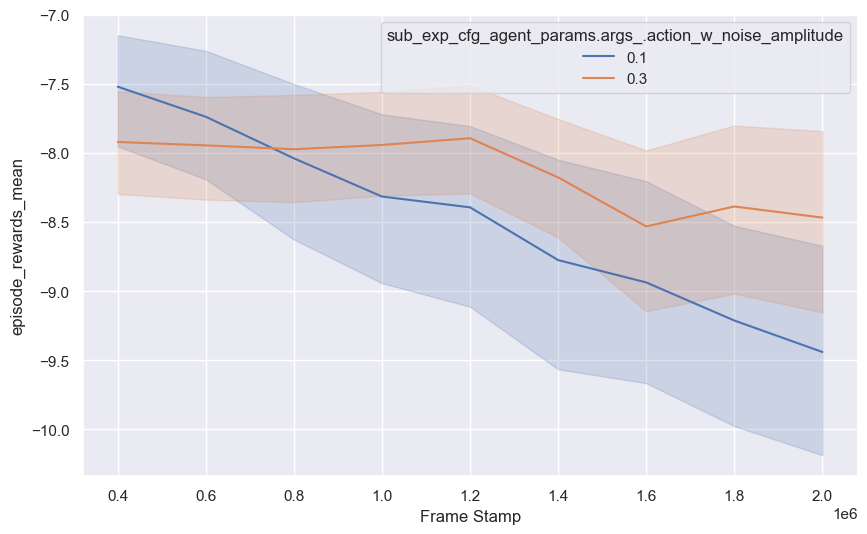

In [7]:
selected_metric = 'episode_rewards_mean'
hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# Filter for validation episodes
validation_df = df[df['epoch_type'] == 'validation']

# Get the unique sorted frame_stamp values
unique_frames = np.sort(validation_df['frame_stamp'].unique())
N = 1
# Get all frame_stamp values after the first N unique ones
filtered_frames = unique_frames[N:]

# Filter the DataFrame to only include rows with these frame_stamp values
filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.show()

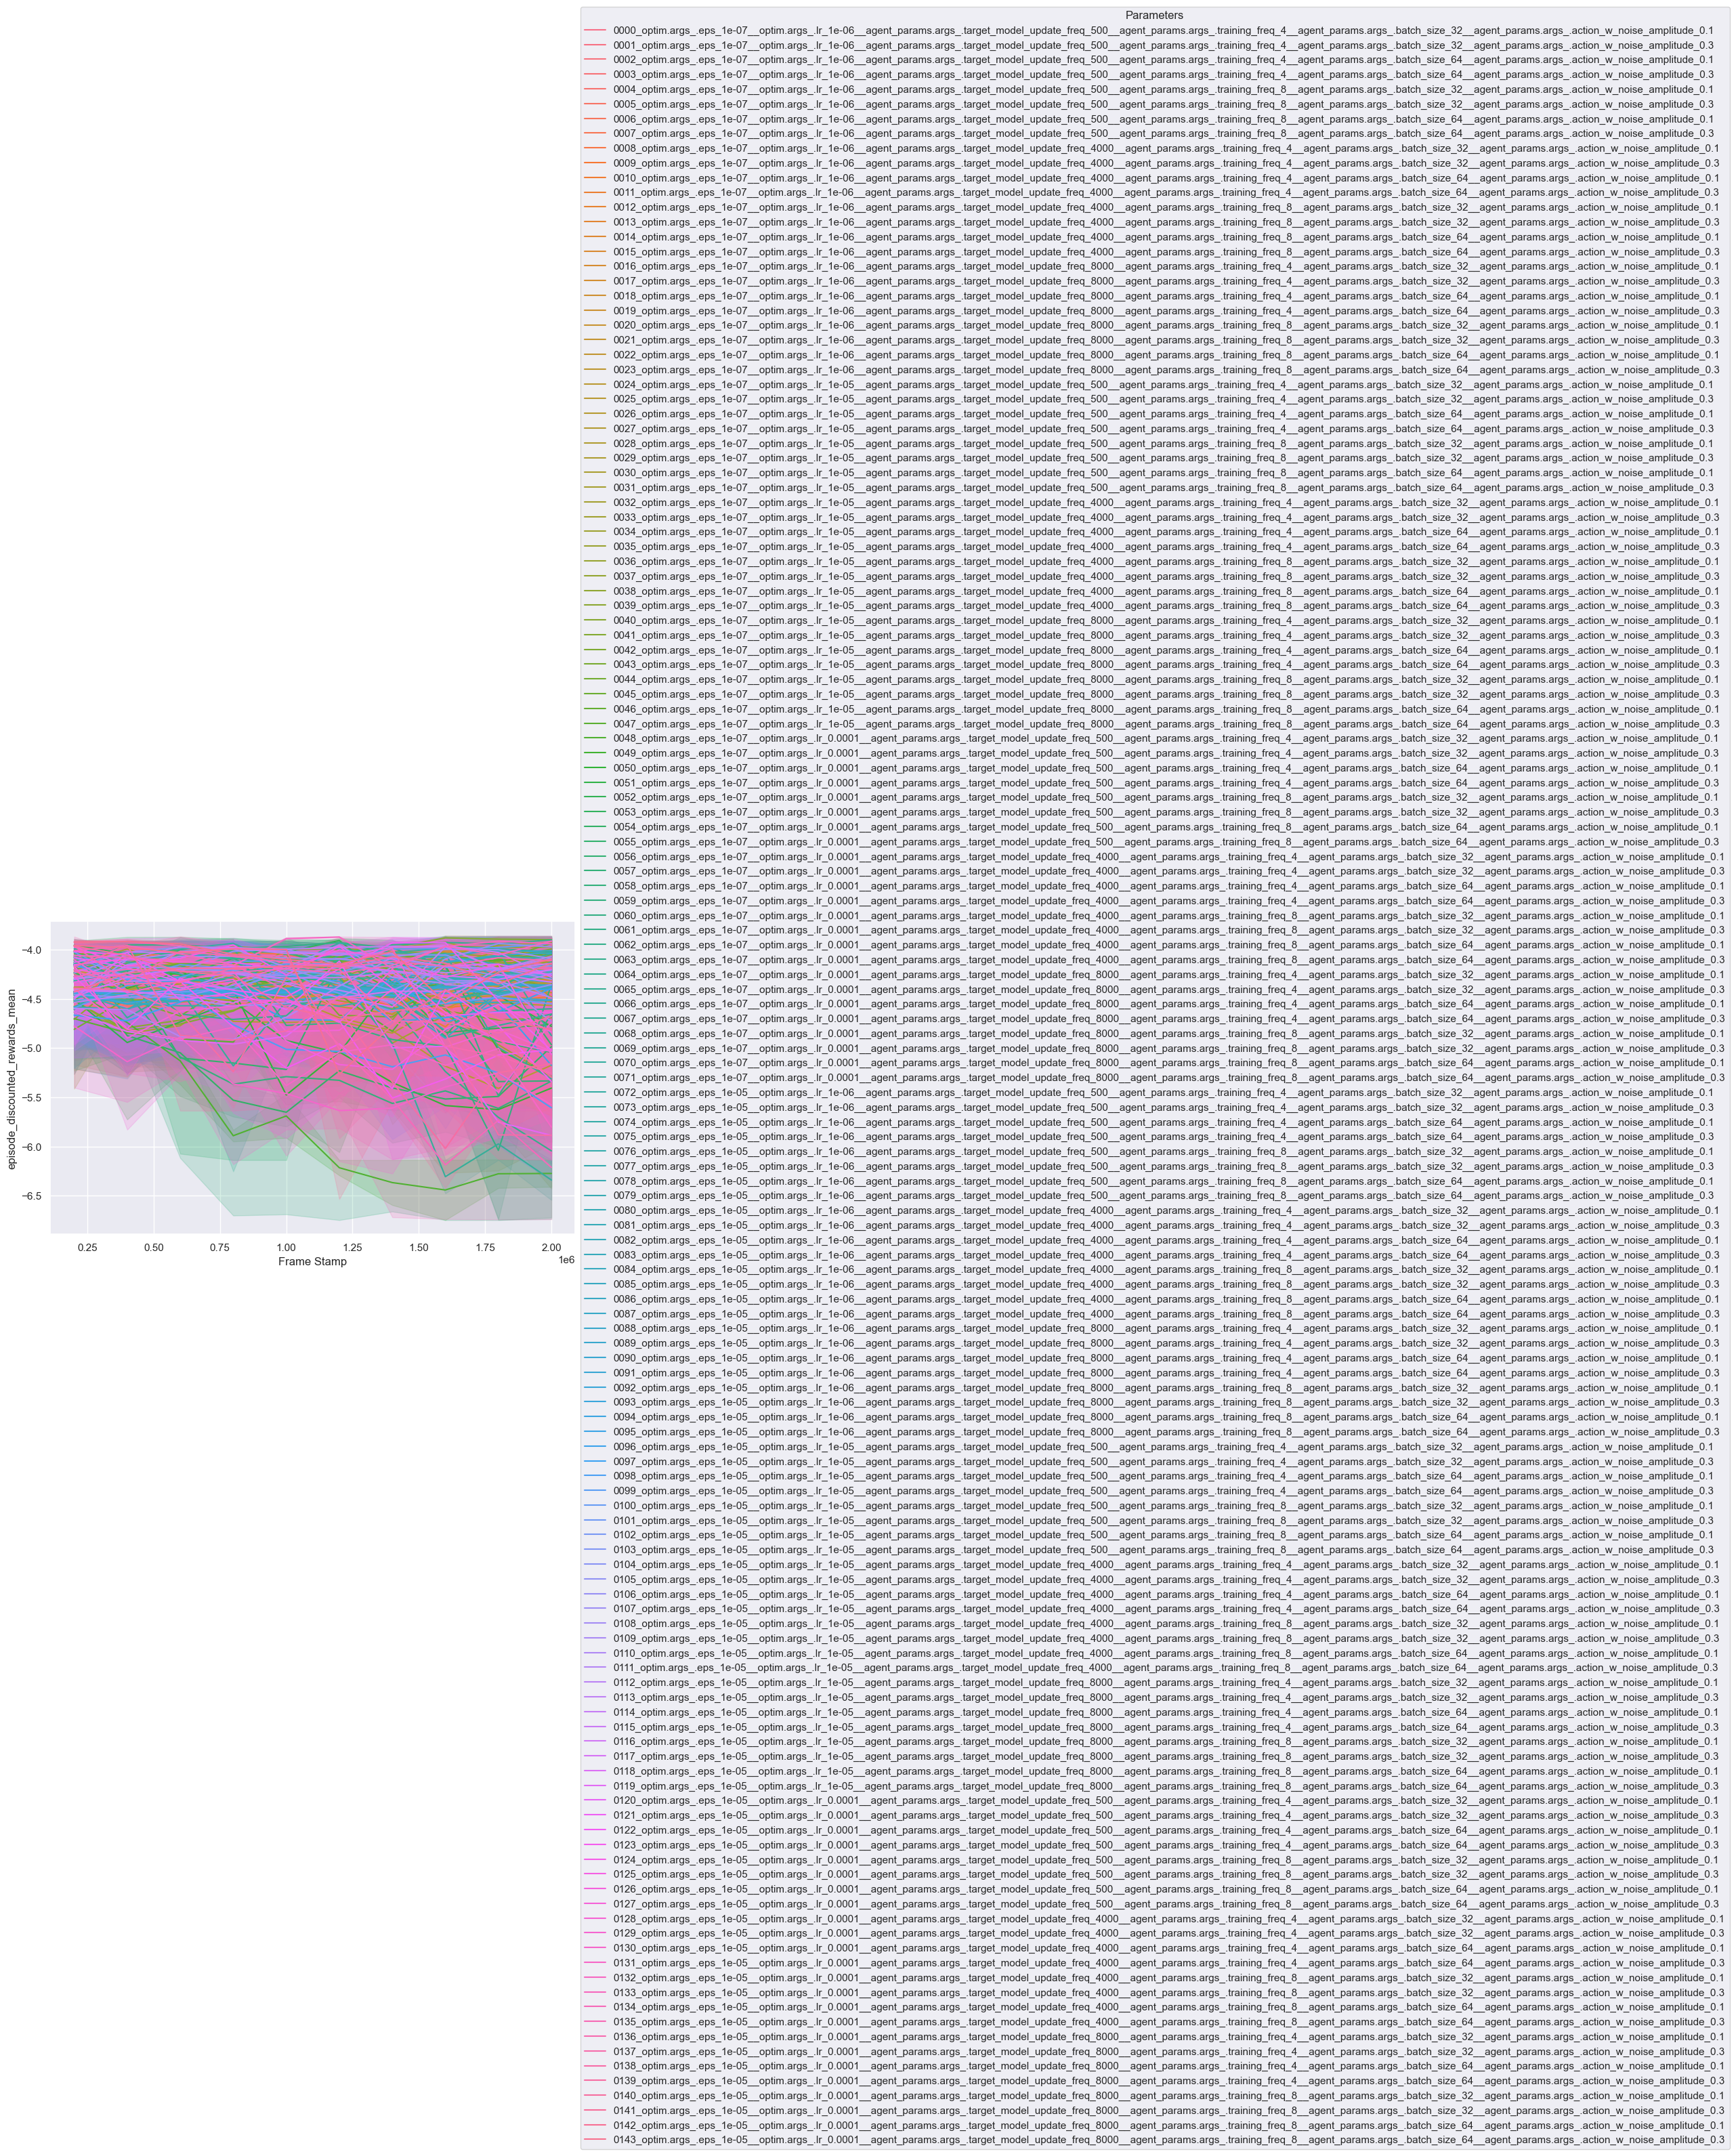

In [ ]:

# selected_metric = 'episode_discounted_rewards_mean'
# # hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
# hue_col = "experiment_name"

# validation_df = df[df['epoch_type'] == 'validation']


# # Create a new figure for each environment
# plt.figure(figsize=(10, 6))
# # sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
# sns.lineplot(data=validation_df, x='frame_stamp', y=selected_metric, hue=hue_col)

# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')

# # Place the legend outside the plot
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
# plt.show()

In [9]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


epoch_type  frame_stamp  episode_rewards_mean  episode_frames_mean  \
19    validation      2000000             -5.845487            18.000000   
39    validation      2000000             -8.378572            28.000000   
59    validation      2000000             -5.969719            19.000000   
79    validation      2000000             -9.668464            34.000000   
99    validation      2000000             -5.877588            18.000000   
...          ...          ...                   ...                  ...   
5679  validation      2000000             -5.591625            17.000000   
5699  validation      2000000             -5.811922            18.000000   
5719  validation      2000000            -17.310960            50.000000   
5739  validation      2000000             -7.816650            28.027778   
5759  validation      2000000             -5.554528            17.000000   

      episode_discounted_rewards_mean  policy_trained_times  \
19                          -3.956693                   NaN   
39                          -4.556709                   NaN   
59                          -3.982830                   NaN   
79                          -4.918595                   NaN   
99                          -3.967048                   NaN   
...                               ...                   ...   
5679                        -3.880112                   NaN   
5699                        -3.937752                   NaN   
5719                        -5.685271                   NaN   
5739                        -4.326744                   NaN   
5759                        -3.862575                   NaN   

      target_trained_times             epoch_time seed  \
19                     NaN 0 days 00:00:00.612966    0   
39                     NaN 0 days 00:00:00.629998    1   
59                     NaN 0 days 00:00:00.639421    0   
79                     NaN 0 days 00:00:00.635255    1   
99                     NaN 0 days 00:00:00.630384    0   
...                    ...                    ...  ...   
5679                   NaN 0 days 00:00:00.661770    1   
5699                   NaN 0 days 00:00:00.607104    0   
5719                   NaN 0 days 00:00:00.363960    1   
5739                   NaN 0 days 00:00:00.380248    0   
5759                   NaN 0 days 00:00:00.395990    1   

                                        experiment_name  \
19    0000_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
39    0000_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
59    0001_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
79    0001_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
99    0002_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
...                                                 ...   
5679  0141_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5699  0142_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5719  0142_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5739  0143_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5759  0143_optim.args_.eps_1e-05__optim.args_.lr_0.0...   

                                    sub_experiment_path  \
19    D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
39    D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
59    D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
79    D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
99    D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
...                                                 ...   
5679  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5699  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5719  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5739  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5759  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   

     sub_exp_cfg_optim.args_.eps sub_exp_cfg_optim.args_.lr  \
19                         1e-07                      1e-06   
39                         1e-07                      1e-06   
59                         1e-07

In [10]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg_agent_params" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

sub_exp_cfg_agent_params.args_.target_model_update_freq  \
0                                                4000        
1                                                4000        
2                                                4000        
3                                                4000        
4                                                4000        
5                                                4000        
6                                                4000        
7                                                4000        
8                                                 500        
9                                                 500        
10                                                500        
11                                                500        
12                                                500        
13                                                500        
14                                                500        
15                                                500        
16                                               8000        
17                                               8000        
18                                               8000        
19                                               8000        
20                                               8000        
21                                               8000        
22                                               8000        
23                                               8000        

   sub_exp_cfg_agent_params.args_.training_freq  \
0                                             4   
1                                             4   
2                                             4   
3                                             4   
4                                             8   
5                                             8   
6                                             8   
7                                             8   
8                                             4   
9                                             4   
10                                            4   
11                                            4   
12                                            8   
13                                            8   
14                                            8   
15                                            8   
16                                            4   
17                                            4   
18                                            4   
19                                            4   
20                                            8   
21                                            8   
22                                            8   
23                                            8   

   sub_exp_cfg_agent_params.args_.batch_size  \
0                                         32   
1                                         32   
2                                         64   
3                                         64   
4                                         32   
5                                         32   
6                                         64   
7                                         64   
8                                         32   
9                                         32   
10                                        64   
11                                        64   
12                                        32   
13                                        32   
14                                        64   
15                                        64   
16                                        32   
17                                        32   
18                                        64   
19                                        64   
20                                        32   
21                                        32   
22                                        64   
23                      

In [11]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path', 'sub_exp_cfg_optim.args_.eps',
       'sub_exp_cfg_optim.args_.lr',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.training_freq',
       'sub_exp_cfg_agent_params.args_.batch_size',
       'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude'],
      dtype='object')

In [12]:
sub_df[[
    "episode_discounted_rewards_mean", "episode_frames_mean",
    "seed", "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"]
]

episode_discounted_rewards_mean  episode_frames_mean seed  \
19                          -3.956693            18.000000    0   
39                          -4.556709            28.000000    1   
59                          -3.982830            19.000000    0   
79                          -4.918595            34.000000    1   
99                          -3.967048            18.000000    0   
...                               ...                  ...  ...   
5679                        -3.880112            17.000000    1   
5699                        -3.937752            18.000000    0   
5719                        -5.685271            50.000000    1   
5739                        -4.326744            28.027778    0   
5759                        -3.862575            17.000000    1   

     sub_exp_cfg_agent_params.args_.action_w_noise_amplitude  
19                                                  0.1       
39                                                  0.1       
59                                                  0.3       
79                                                  0.3       
99                                                  0.1       
...                                                 ...       
5679                                                0.3       
5699                                                0.1       
5719                                                0.1       
5739                                                0.3       
5759                                                0.3       

[288 rows x 4 columns]

In [13]:
sub_df[
    (sub_df["sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"] == "0.3") 
]

epoch_type  frame_stamp  episode_rewards_mean  episode_frames_mean  \
59    validation      2000000             -5.969719            19.000000   
79    validation      2000000             -9.668464            34.000000   
139   validation      2000000             -5.859113            18.000000   
159   validation      2000000            -13.049590            50.000000   
219   validation      2000000             -5.892921            18.000000   
...          ...          ...                   ...                  ...   
5599  validation      2000000            -13.158839            40.000000   
5659  validation      2000000             -7.581080            25.000000   
5679  validation      2000000             -5.591625            17.000000   
5739  validation      2000000             -7.816650            28.027778   
5759  validation      2000000             -5.554528            17.000000   

      episode_discounted_rewards_mean  policy_trained_times  \
59                          -3.982830                   NaN   
79                          -4.918595                   NaN   
139                         -3.960319                   NaN   
159                         -5.032263                   NaN   
219                         -3.975100                   NaN   
...                               ...                   ...   
5599                        -5.634237                   NaN   
5659                        -4.394127                   NaN   
5679                        -3.880112                   NaN   
5739                        -4.326744                   NaN   
5759                        -3.862575                   NaN   

      target_trained_times             epoch_time seed  \
59                     NaN 0 days 00:00:00.639421    0   
79                     NaN 0 days 00:00:00.635255    1   
139                    NaN 0 days 00:00:00.618560    0   
159                    NaN 0 days 00:00:00.624452    1   
219                    NaN 0 days 00:00:00.622094    0   
...                    ...                    ...  ...   
5599                   NaN 0 days 00:00:00.362652    1   
5659                   NaN 0 days 00:00:00.656690    0   
5679                   NaN 0 days 00:00:00.661770    1   
5739                   NaN 0 days 00:00:00.380248    0   
5759                   NaN 0 days 00:00:00.395990    1   

                                        experiment_name  \
59    0001_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
79    0001_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
139   0003_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
159   0003_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
219   0005_optim.args_.eps_1e-07__optim.args_.lr_1e-...   
...                                                 ...   
5599  0139_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5659  0141_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5679  0141_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5739  0143_optim.args_.eps_1e-05__optim.args_.lr_0.0...   
5759  0143_optim.args_.eps_1e-05__optim.args_.lr_0.0...   

                                    sub_experiment_path  \
59    D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
79    D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
139   D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
159   D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
219   D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
...                                                 ...   
5599  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5659  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5679  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5739  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   
5759  D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...   

     sub_exp_cfg_optim.args_.eps sub_exp_cfg_optim.args_.lr  \
59                         1e-07                      1e-06   
79                         1e-07                      1e-06   
139                        1e-07

In [14]:
# Print the experiment_name of the row with the highest episode_rewards_mean 
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['experiment_name'].values[0])
# print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['episode_rewards_mean'].values[0])


D:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025May02-101004_configs\0025_optim.args_.eps_1e-07__optim.args_.lr_1e-05__agent_params.args_.target_model_update_freq_500__agent_params.args_.training_freq_4__agent_params.args_.batch_size_32__agent_params.args_.action_w_noise_amplitude_0.3\1


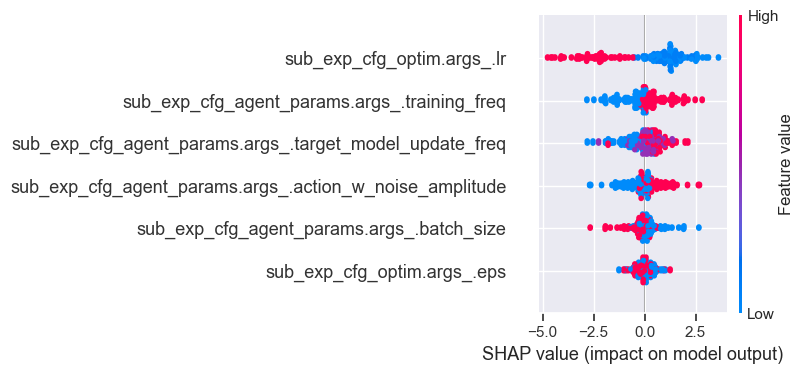

In [15]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [16]:
hyperparam_columns

['sub_exp_cfg_optim.args_.eps',
 'sub_exp_cfg_optim.args_.lr',
 'sub_exp_cfg_agent_params.args_.target_model_update_freq',
 'sub_exp_cfg_agent_params.args_.training_freq',
 'sub_exp_cfg_agent_params.args_.batch_size',
 'sub_exp_cfg_agent_params.args_.action_w_noise_amplitude']

In [17]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()
